In [46]:

import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

In [47]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

In [48]:
%matplotlib inline

In [74]:
df = pd.DataFrame({'Movies':['action film', 'Romance film' ,'documentary', 'Romance film', 'Science fiction film', 'Science fiction film', 'Science fiction film',  
                             'Romance film', 'action film', 'action film', 'Romance film', 'documentary', 'documentary', 'Romance film', 'Science fiction film',
                            'Romance film', 'documentary', 'action film', 'action film', 'Science fiction film',], 
                   'Rating':[8.7, 8.7, 8.6, 8.5, 8.6, 8.5, 8.2, 8.1, 
                              8.4, 8.4, 8.4, 8.3, 8.3, 8.2, 8.3,
                            8.3, 8.2,8.0, 8.1,7.9]})

/Users/xiaoyanglong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xiaoyanglong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xiaoyanglong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr


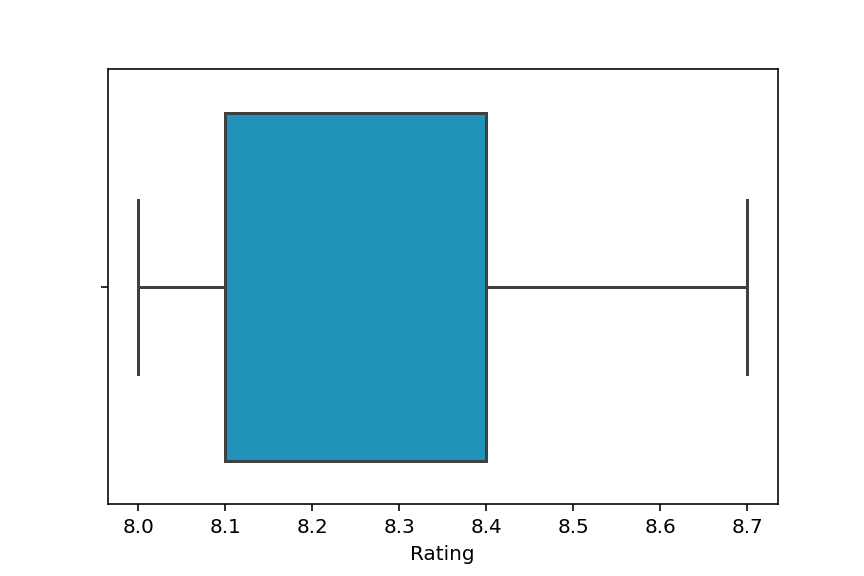
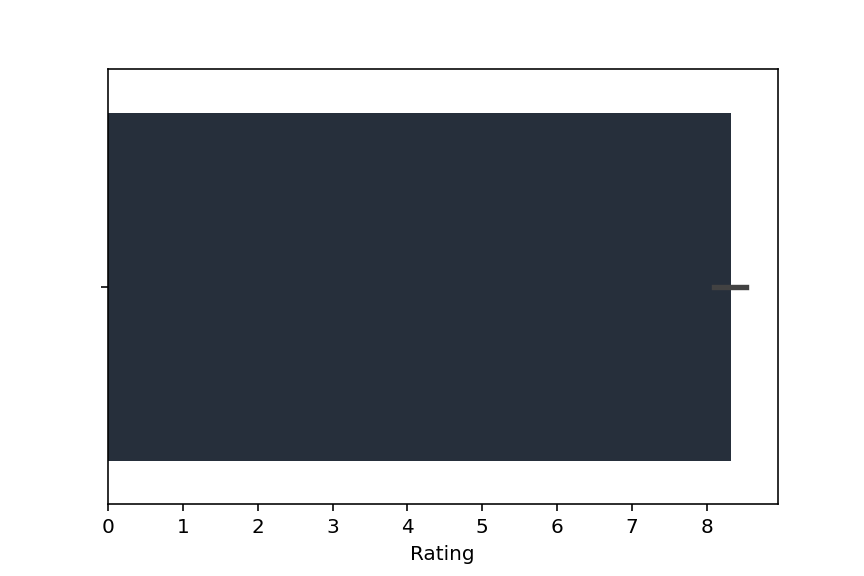
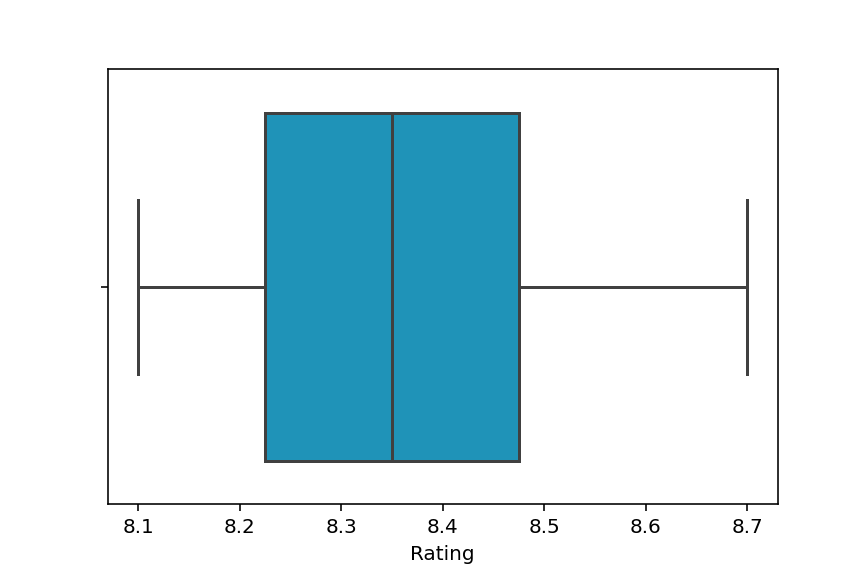
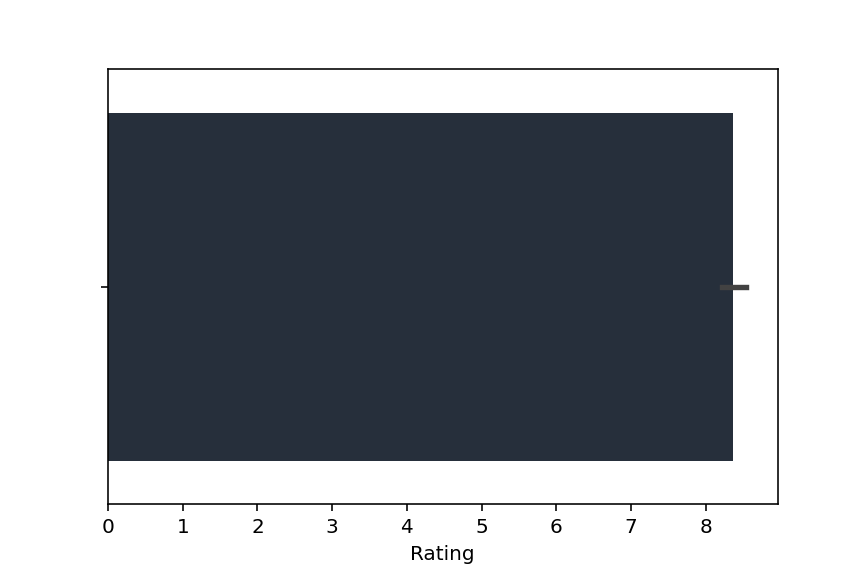
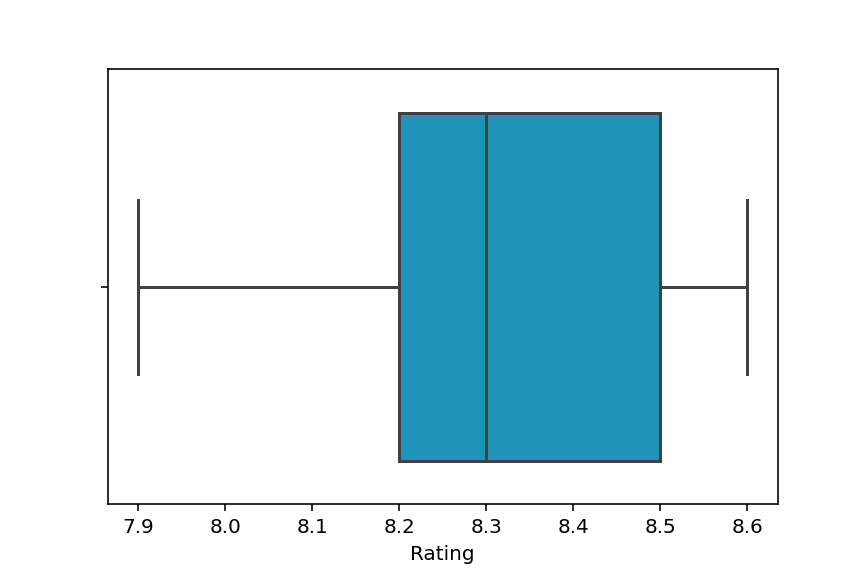
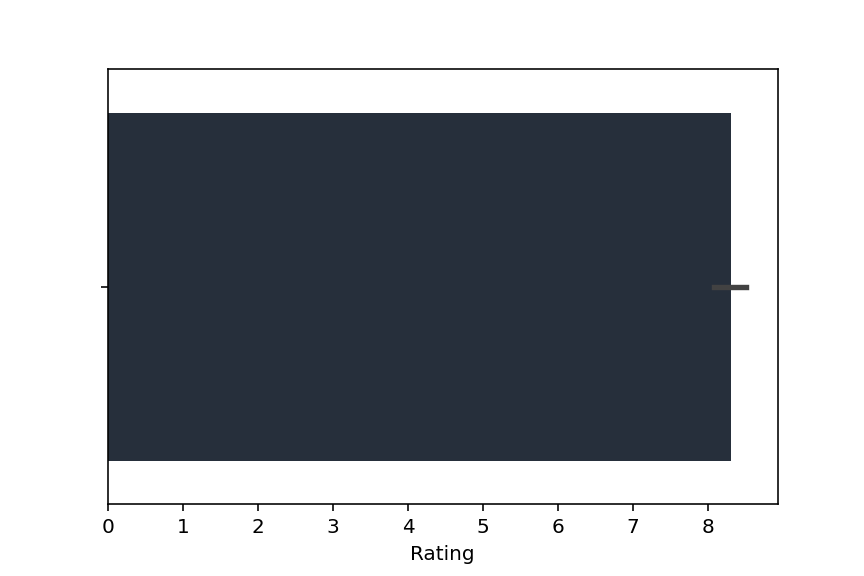
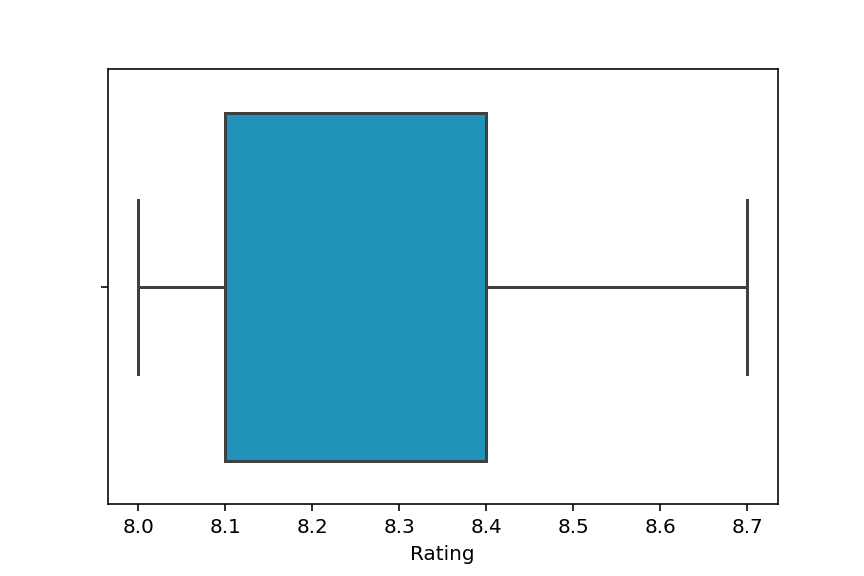
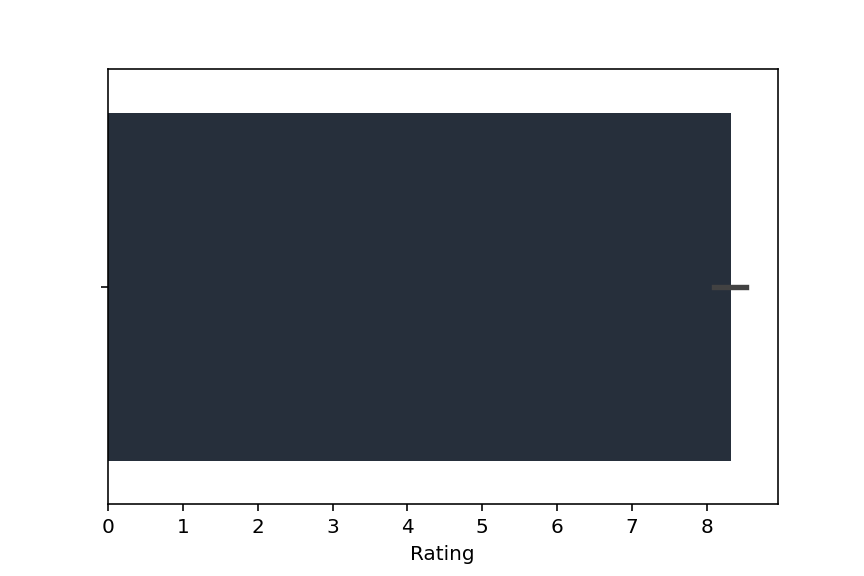
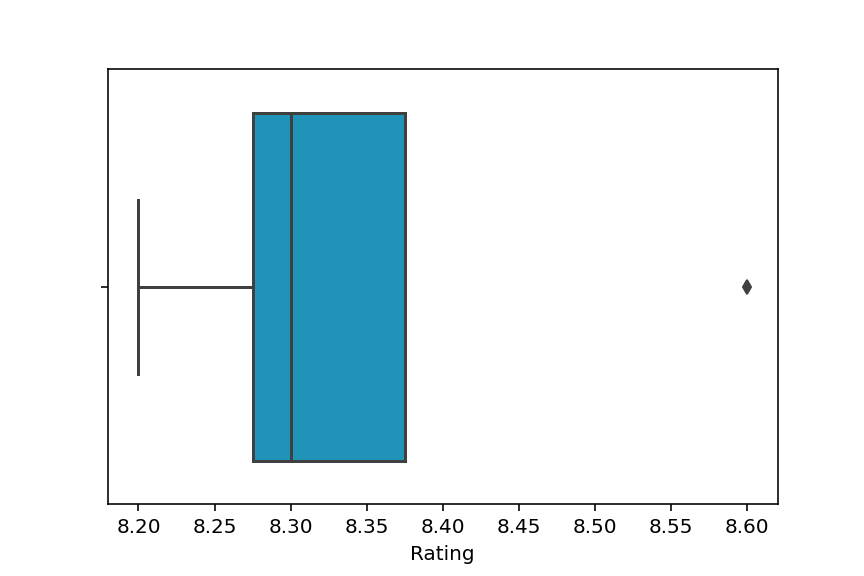
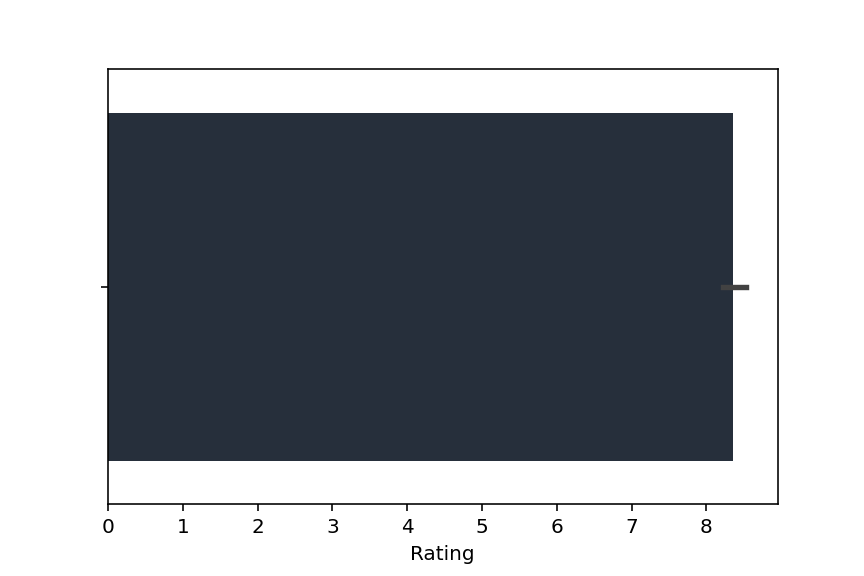

In [75]:
class RatingsDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'The Godfature'
    Movies = param.ObjectSelector(default='action film', objects=list(df.Movies.unique()))
    
    # create data set containing only the data applicable to the movie in the drop down selector
    def get_data(self):
        class_df = df[(df.Movies==self.Movies)].copy()
        return class_df
    
    # seaborn box plot for the chosen movie
    #Add another visualization!
    #change the color! Find a companies branding website and use their approved HEX code, RGB
    # Amazon Alexa branding website:https://developer.amazon.com/en-US/alexa/branding/alexa-guidelines/brand-guidelines/color
    
    def box_view(self):
        data = self.get_data() 
        sns.set_palette(sns.color_palette(["#05A0D1"]))
        ax = sns.boxplot(data['Rating'])
        plt.close()
        return ax.figure
    
    
    def bar_view(self):
        data = self.get_data() 
        sns.set_palette(sns.color_palette(["#232F3E"]))
        ax = sns.barplot(data['Rating'])
        plt.close()
        return ax.figure


    def table_view(self):
        data = self.get_data()
        return data
    
    
# create an instance of the class
rd = RatingsDashboard(name='')

# create a title for the dashboard
dashboard_title = '# The ratings for the popular movies'

# create some text describing the dashboard
dashboard_desc = 'The very high-ratings movies from TMDB'


dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       
                      rd.box_view,
                      rd.bar_view,
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 1)
    